<a href="https://colab.research.google.com/github/sehgalsakshi/Word2Vec-Skip-Gram-Neural-Network-Implementation-from-Scratch/blob/main/Word2Vec_(Tensorflow_2_0_And_Keras_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec

### Word2Vec is an unsupervised technique for modelling word embeddings in a way that words similar to each other are placed on similar positions in word vector.
<b>Word Vector?</b> What is that?
<ul>
<li>Before word vector, we had (still have!) plain and simple word embeddings where each word is represented by a <b>sparse matrix</b> representation, represented by 1 (or the count of specific word) corresponding to the document it is present in.</li>
<li>Word Embedding was a crude way of representing words but was somewhat improved using approaches like <b>TF-IDF</b> which emphasizes on repetition of word within document but rarity within corpus to show the importance. </li>
<li>Word embeddings just told us about the presence or absence of word but what gives meaning to a sentence is presence of a word with respect to other words</li>
<li>This is exactly what word vector does! Word vector is just a vector that explains a meaning of the word. </li>
<li>It does so by having different features to represent a word. These features are the context words that may or may not be surrounding the given word.</li>
<li><b>a word vector is a row of real valued numbers (as opposed to dummy numbers) where each point captures a dimension of the word’s meaning and where semantically similar words have similar vectors.</b></li>
<li>Since it's the mathematical representation of <b>word meanings</b>, hence there should be a way to extract mathematical equations for word meanings</li>
<li> Using word vectors we can get equations like <i>King - Man + Woman = Queen </i></li> 
</ul>

# The Corpus

---



In [1]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [2]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [3]:
corpus = remove_stop_words(corpus)

In [4]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

here we have word set by which we will have word vector

In [5]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

# Data Generation
we will generate label for each word using skip gram.

In [6]:
word2int = {}

for i,word in enumerate(words):
    #saving word index to get word embedding
    word2int[word] = i

sentences = []
for sentence in corpus:
    #Each sentence is represented as a list of words
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

Window size of 2 here says meaning of word can be dedices by looking at word with 2 neighboring words in both direction

In [7]:
data

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [8]:
import pandas as pd
for text in corpus:
    #corpus is a list of documents, we're just printing individual documents(sentences)
    print(text)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [9]:
df = pd.DataFrame(data, columns = ['input', 'label'])

In [10]:
df.head()

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king


Data's input is the word and labels are the context words around input.

In [11]:
df.shape

(52, 2)

In [12]:

word2int

{'boy': 4,
 'girl': 7,
 'king': 1,
 'man': 0,
 'pretty': 3,
 'prince': 11,
 'princess': 8,
 'queen': 9,
 'strong': 5,
 'wise': 10,
 'woman': 6,
 'young': 2}

# Define Tensorflow Graph

In [13]:
import tensorflow as tf
import numpy as np

In [14]:
ONE_HOT_DIM = len(words)

In [15]:
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

In [16]:
X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))


In [17]:
df.iloc[0], X[0], Y[0], word2int[df.input[0]], word2int[df.label[0]]

(input      king
 label    strong
 Name: 0, dtype: object,
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 1,
 5)

Here we can see, index in word2int is 1 for the corresponding word

In [77]:
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# Model Parameters

In [245]:
# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2  #2 neurons in hidden layer

In [246]:
#cross entropy loss function
@tf.function
def custom_loss(y_true, y_pred):
  loss =  tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(tf.clip_by_value(y_pred,1e-12,1.0)), axis=[1]))
  #loss =  tf.nn.softmax_cross_entropy_with_logits(labels=y_pred,logits=y_true)
  return loss

In [247]:
#RMSProp optimizer as we're dealing with sparse matrix
rms_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Implementation with TensorFlow Custom Layers

<a href = "https://stackoverflow.com/questions/57086301/custom-neural-network-implementation-on-mnist-using-tensorflow-2-0">Model Preparation with the help of this link</a>

In [254]:
class HiddenLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units

    # Use build to create variables, as shape can be inferred from previous layers
    # If you were to create layers in __init__, one would have to provide input_shape
    # (same as it occurs in PyTorch for example)
    def build(self, input_shape):
        # You could use different initializers here as well
        self.kernel = self.add_weight(name = 'W1',
            shape=(ONE_HOT_DIM, EMBEDDING_DIM),
            initializer="random_normal",
            trainable=True,
        )
        self.bias = self.add_weight(shape=(self.units,), initializer="random_normal")
        # Oh, trainable=True is default

    def call(self, inputs):
        # Use overloaded operators instead of tf.add, better readability
        return tf.matmul(inputs, self.kernel) + self.bias
		
		
class OutputLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units

    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.bias = self.add_weight(shape=(self.units,), initializer="random_normal")
        
    def call(self, inputs):
        return tf.nn.softmax(tf.matmul(inputs, self.kernel) + self.bias)
		
class MyWord2VecTF2(tf.keras.Model):
    def __init__(self, hidden_units):
        super().__init__()
        # Use Sequential here for readability
        self.network = tf.keras.Sequential(
            [HiddenLayer(hidden_units), OutputLayer(ONE_HOT_DIM)]
        )

    def call(self, inputs):
        # You can use non-parametric layers inside call as well
        flattened = tf.keras.layers.Flatten()(inputs)
        return self.network(flattened)

<a href = "https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb"> Model has been prepared using this notebook</a>

<a href = "https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc">This explains the above arguments to tf</a>

<a href = "https://stackoverflow.com/questions/36693740/whats-the-difference-between-tf-placeholder-and-tf-variable">Placeholder vs Variables</a>

<a href = "https://medium.com/red-buffer/tensorflow-1-0-to-tensorflow-2-0-coding-changes-636b49a604b" > Also used this for basic migration from tf 1 to tf 2</a>

# Implementation with Keras

In [253]:
class MyWord2VecKeras(tf.keras.Model):
  def __init__(self, hidden_units):
    super(MyWord2Vec, self).__init__()
    self.dense_output = tf.keras.layers.Dense(units=ONE_HOT_DIM, activation=tf.nn.softmax)
    self.dense_hidden = tf.keras.layers.Dense(units=hidden_units)
    self.input_layer = tf.keras.layers.Flatten(input_shape = (None, ONE_HOT_DIM))
  
  def call(self, x):
    x = self.input_layer(x)
    x = self.dense_hidden(x)
    x = self.dense_output(x)
    return x

# Model Instantiation and Training

In [255]:
class MyModel:
  def __init__(self, hidden_units, model_type = 'tf2'):
    self.model = None
    if model_type == 'tf2':
      self.model = MyWord2VecTF2(EMBEDDING_DIM) #core tf 2 implementation
    else:
      self.model = MyWord2VecKeras(EMBEDDING_DIM) #for keras Model

In [256]:
model = MyModel(EMBEDDING_DIM, 'tf2').model

In [257]:
model.compile(
    optimizer=rms_optimizer,
    loss=custom_loss
)

In [258]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 2ms/step - loss: 2.4896
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 2.4740
Epoch 3/200
2/2 [==============================] - 0s 2ms/step - loss: 2.4596
Epoch 4/200
2/2 [==============================] - 0s 2ms/step - loss: 2.4498
Epoch 5/200
2/2 [==============================] - 0s 2ms/step - loss: 2.4379
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 2.4276
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 2.4192
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 2.4055
Epoch 9/200
2/2 [==============================] - 0s 2ms/step - loss: 2.3975
Epoch 10/200
2/2 [==============================] - 0s 1ms/step - loss: 2.3857
Epoch 11/200
2/2 [==============================] - 0s 2ms/step - loss: 2.3775
Epoch 12/200
2/2 [==============================] - 0s 1ms/step - loss: 2.3668
Epoch 13/200
2/2 [==============================] - 0s 1ms/st

# Getting the hidden layer parameters

Since our fake task of generating context is done, now time to get word vectors from hidden layer parameters

In [259]:
b1 = model.network.get_layer(index=0).bias.numpy()
W1 = model.network.get_layer(index=0).kernel.numpy()
vectors = W1 + b1
print(vectors)

[[ 2.5188022   0.93887347]
 [ 1.3514935   0.52499413]
 [ 0.11886011 -1.0395901 ]
 [-0.50528145 -3.2685986 ]
 [ 1.6563097  -0.84091216]
 [ 2.2059987  -2.8390076 ]
 [-1.1173006   0.49354368]
 [-0.20038411 -2.0559227 ]
 [-1.010278   -0.57078254]
 [-0.49949157 -0.8007641 ]
 [-1.5529225  -3.0738468 ]
 [ 2.8800201  -0.4207744 ]]


In [260]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,man,2.518802,0.938873
1,king,1.351493,0.524994
2,young,0.118860,-1.039590
3,pretty,-0.505281,-3.268599
4,boy,1.656310,-0.840912
5,strong,2.205999,-2.839008
6,woman,-1.117301,0.493544
7,girl,-0.200384,-2.055923
8,princess,-1.010278,-0.570783
9,queen,-0.499492,-0.800764


# Finally, the Visualization

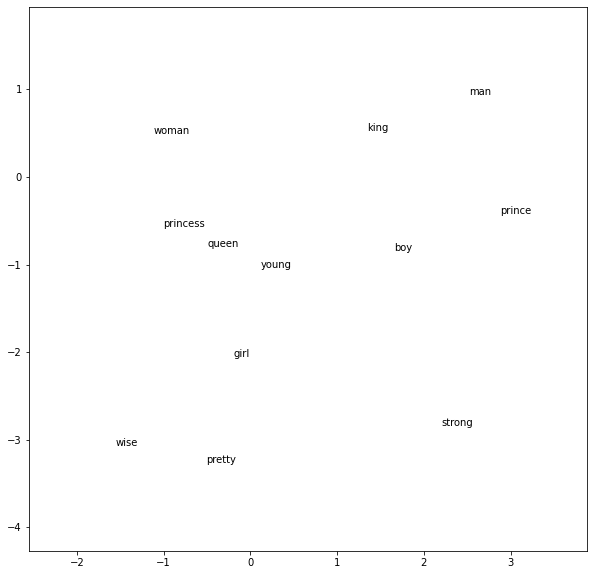

In [261]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()